# **Clasificación binaria: Titanic**

*El objetivo consiste en crear un clasificador que prediga la supervivencia según los datos del pasajero/a del Titanic. El dataset incluye la columna objetivo **Survived** la cual puede tener dos valores, 0(no sobrevivió) o 1(sobrevivió). Esta es la columna que se va a **predecir**.*

Se utilizarán los siguientes 3 modelos de clasificación:


1. SGD Classifier
2. Random Forest Classifier
3. XGBoost Classifier



Fuente del dataset: https://www.kaggle.com/datasets/yasserh/titanic-dataset pero con modificaciones posteriores propias.

**Notebook realizado por**

> ### *Paloma Mareque Martínez*
---


Importación de librerías necesarias:
- *sys*
- *os*
- *sklearn*
- *numpy*

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os


Librerías que permiten generar gráficos muy visuales para la representación de datos:  
- *seaborn*
- *matplotlib*

In [2]:
%matplotlib inline

import matplotlib as mpl;
import matplotlib.pyplot as plt;

# tamaño del texto en las etiquetas por defecto
mpl.rc('axes',  labelsize=14);
mpl.rc('xtick', labelsize=12);
mpl.rc('ytick', labelsize=12);

import seaborn as sns

## Obteniendo los datos

#### Importamos la librería *pandas* para leer el fichero csv *tested.csv* :

In [3]:
# solo en Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*read_csv* es la función de *pandas* para leer el ficheros csv.

In [4]:
import pandas as pd;

titanic = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SAA/datasets/titanic/tested.csv");
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Con la función *len()* vemos que este dataset tiene 418 filas de datos. 

In [5]:
len(titanic)


418

El dataset tiene columnas de distintos **tipos de datos**:

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


- numérico (int64, float64):
> PassengerId (ID de pasajero), Survived(0=dead, 1=Alive), Pclass(clase del pasajero,1 = First class 2 = Second class 3 = Third class), Age(edad), SibSp(hijos por pasajero), Parch, y Fare(tarifa).

- categórico (object): 
>Name(nombre de pasajero), Sex(sexo del pasajero), Ticket(nº de ticket), Cabin(tipo de cabina), y Embarked(puerto de embarcación).

De las 12 columnas del dataset hay **3 columnas** con **datos nulos**: **Age**(332/418 no nulos), **Fare**(471/418 no nulos) y **Cabin**(91/418 no nulos).Para probar los modelos necesitamos pasar los datos nulos y categóricos a valores numéricos, no se pueden probar los modelos sin antes realizar una limpieza de datos.

El método *info()* proporciona los valores no nulos(non-null) de cada columna (y por tanto también los nulos), aunque es muy útil y más visual obtener el número de valores nulos por columna con *isnull().sum()*. Esta función devuelve el número total de valores nulos contenidos en cada columna del dataset, *isnull()* devuelve un objeto DataFrame en el que todos los valores se sustituyen por un valor booleano True para valores NA (no numéricos), y False en caso contrario. *sum()* devuelve la suma de todos los valores True por columna. 
El método *isna()* hace exactamente lo mismo que *isnull()* ->
https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **Exploración de datos**: visualización y correlaciones

El método *describe()* realiza un análisis estadístico de los datos entre todas las columnas del dataset.

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Al igual que *info()*, *count()* devuelve el número de valores no nulos por columna.

Analizando estos datos estadísticos podemos deducir que la columna Survived es una columna binaria porque los cuartiles y los valores mínimo y máximo solamente toman los valores 0 o 1. 

También podemos observar, por ejemplo en la columna Age, que la media de edad de los pasajeros es de 30 años, el más viejo tiene 76 y el más joven tiene menos de un año(0.17).

Con la función *countplot()* de la librería *Seaborn* de Python podemos generar un gráfico de barras para ver la distribución de los valores categóricos en la columna "Sex" relacionados con la columna numérica Survived.

<Axes: xlabel='Sex', ylabel='count'>

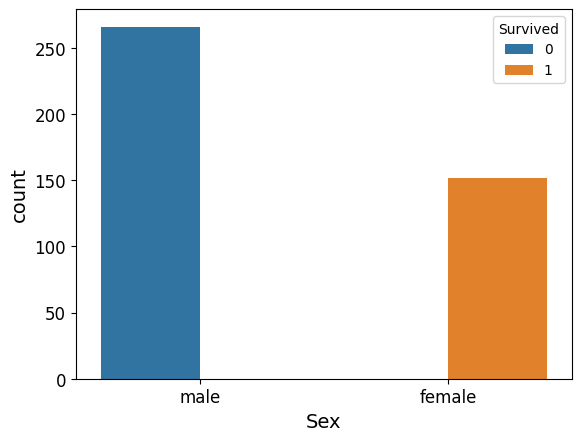

In [9]:
sns.countplot(data=titanic, x='Sex', hue='Survived')

>Viendo el gráfico de barras podemos observar que había más hombres que mujeres a bordo del barco. En cambio, la mayoría de los pasajeros que sobrevivieron al hundimiento del Titanic fueron mujeres, mientras que la mayoría de los pasajeros que no sobrevivieron fueron hombres.

Podemos utilizar la función *pairplot()* para visualizar la relación entre las columnas numéricas más importantes del conjunto de datos, las cuales en este dataset son Age, Pclass y Survived. Cada columna se va a mostrar en un eje diferente y los puntos representan los valores de cada observación. 

La diagonal del gráfico muestra un histograma para cada variable, proporcionando una visión general de la **distribución de los datos** en el dataset.



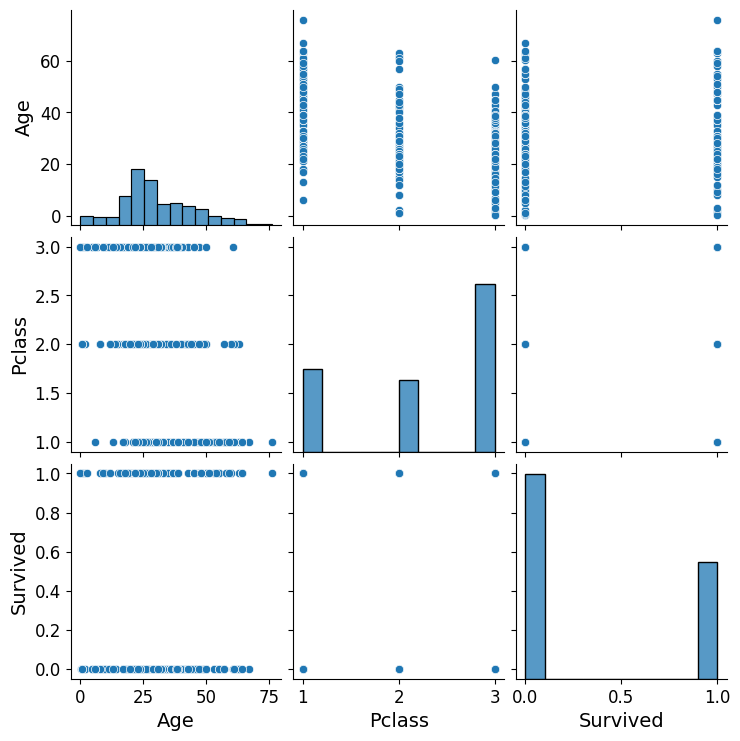

In [10]:
sns.pairplot(data=titanic[['Age', 'Pclass', 'Survived']])

En este gráfico podemos observar, por ejemplo, que la mayoría de los pasajeros del Titanic eran de clase baja (tercera clase), que tenían entre 20 y 40 años y que no sobrevivieron al naufragio.

Además, podemos ver que hay una relación entre la edad y la supervivencia de los pasajeros. Los puntos rojos representan a los pasajeros que sobrevivieron al naufragio, y podemos ver que hay más puntos rojos en el extremo izquierdo del gráfico (donde se encuentran los pasajeros más jóvenes) que en el extremo derecho (donde se encuentran los pasajeros más mayores).


Para visualizar el **histograma** de todas las columnas numéricas usamos *hist()*:

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

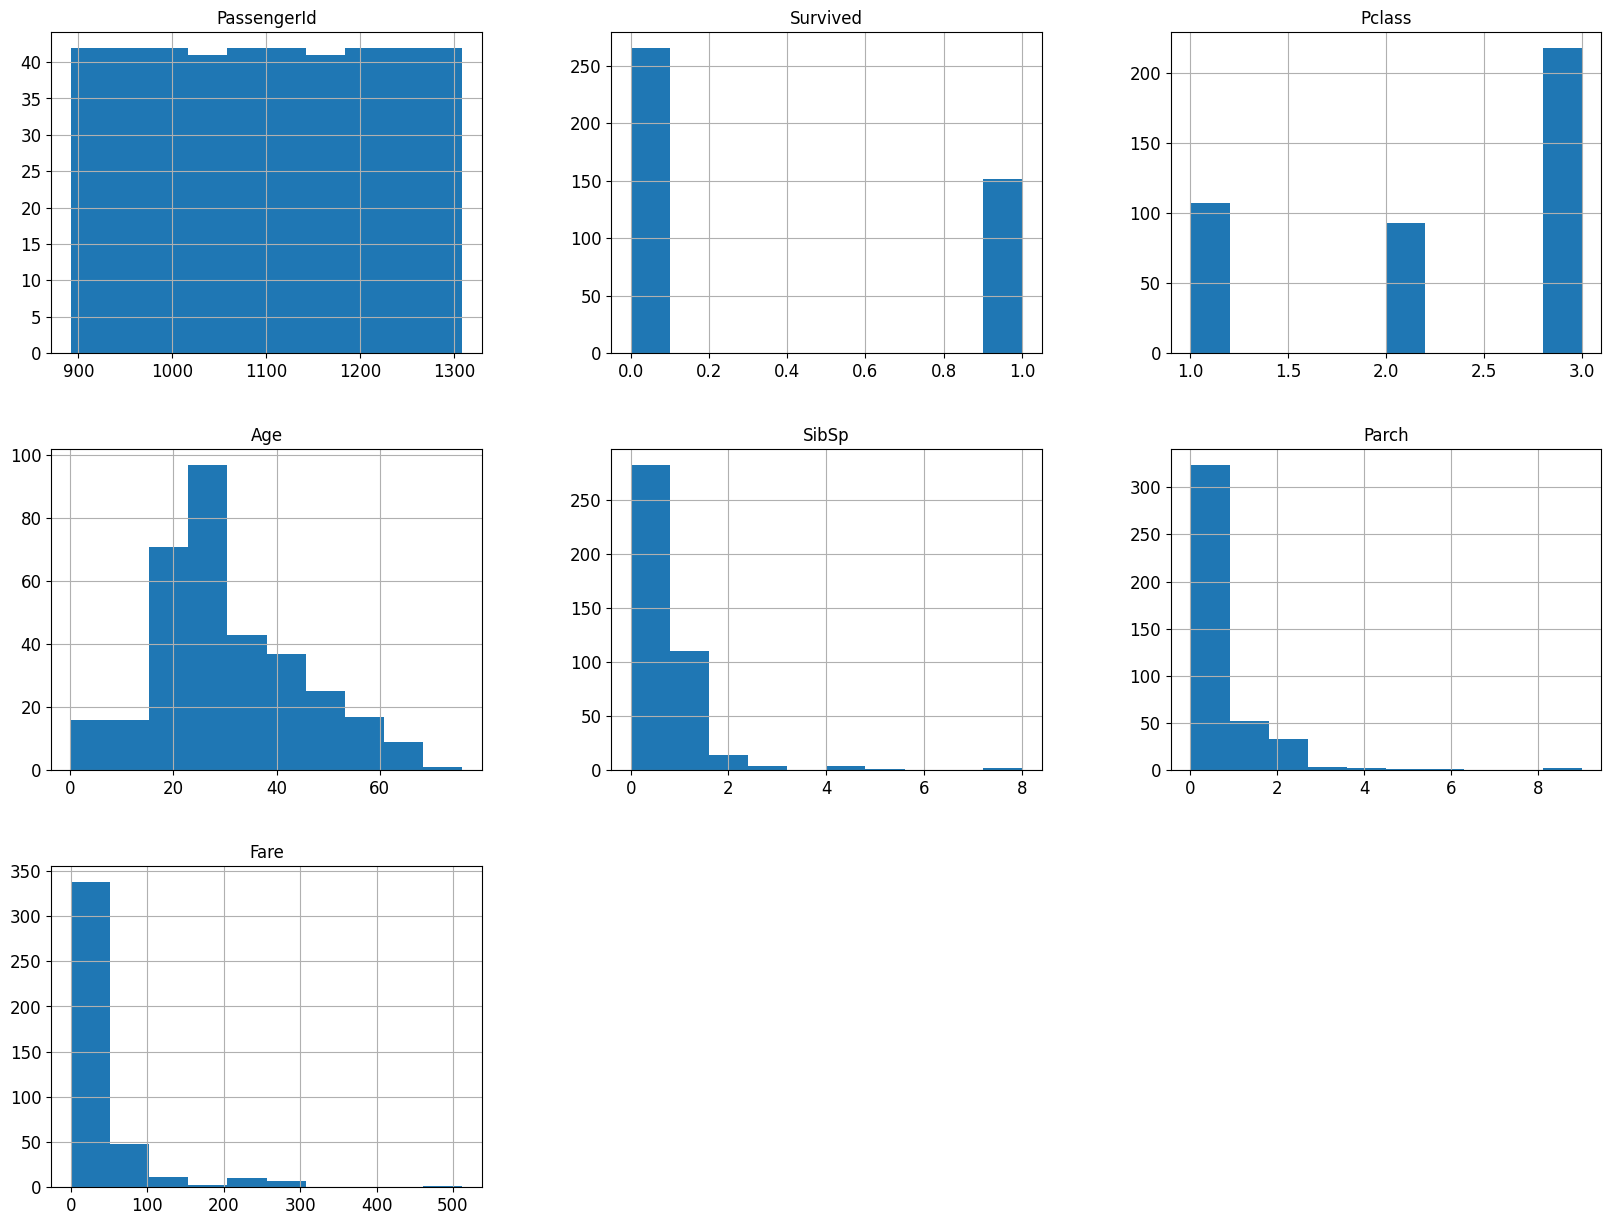

In [11]:
titanic.hist(figsize=(20,15))

**Correlaciones entre columnas:**

In [12]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


Con esta tabla de correlaciones se puede analizar lo siguiente:
- la columna Survived tiene una correlación positiva moderada con las columnas SibSp y Parch, lo que indica que las personas que viajaban con familiares tenían una mayor probabilidad de sobrevivir. 
- la columna Pclass tiene la correlación más baja con la columna Fare, lo que sugiere que los pasajeros de primera clase pagaron más por sus billetes que los de tercera clase.
- la columna Age tiene una correlación negativa moderada con la columna Pclass, lo que indica que los pasajeros más jóvenes tendían a viajar en clases más bajas.

Aquí ``` sort_values``` permite ver las correlaciones de *Survived* con el resto de columnas del dataset de forma ordenada de mayor a menor, como se establece en el parámetro ``` ascending=False```.

In [13]:
corr_matrix = titanic.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191514
Parch          0.159120
SibSp          0.099943
Age           -0.000013
PassengerId   -0.023245
Pclass        -0.108615
Name: Survived, dtype: float64

# **Limpieza de datos**

## **1.** Eliminación de columnas irrelevantes
Vamos a hacer un *drop()* para eliminar las columnas **Name** y **Ticket** ya que no aportan datos relevantes al dataset. De esta forma el dataset pasará a tener 10 columnas.

In [14]:
titanic=titanic.drop(["Name"], axis=1);
titanic=titanic.drop(["Ticket"], axis=1);
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,12.2875,NaN,S


## **2.** Limpieza de columnas de tipo numérico: sustitución de valores NaN por la media total
- Age: edad
- Fare: tarfia del billete

> COLUMNA **Age**

La columna **Age** tiene 86 valores nulos(NaN), que van a ser sustituídos por la media total de edades.

Nulos del dataset:



In [16]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
# nulos de la columna Age
titanic["Age"].isnull().sum()

86

La media de edad de los pasajeros es de aproximadamente 30'27 años. Este será el nuevo valor de los campos con valores NaN.

In [18]:
mean_Age = titanic["Age"].mean();
mean_Age

30.272590361445783

Para que se apliquen los cambios en la columna hay que poner a True el parámetro *inplace*.

In [19]:
titanic["Age"].fillna(mean_Age, inplace=True)

✅ Comprobamos que la columna **Age** ya no tiene valores nulos:

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


✅ Ahora Age ya no tiene valores nulos

In [21]:
titanic["Age"].isnull().sum()

0

Como ejemplo podemos ver que los valores de las filas 413, 416 y 417 eran nulos porque ahora tienen el valor de la media total de edades 30'27259.

In [22]:
titanic[["Age"]]

,Age
0,34.50000
1,47.00000
2,62.00000
3,27.00000
4,22.00000
...,...
413,30.27259
414,39.00000
415,38.50000
416,30.27259


> COLUMNA **Fare**

La columna **Fare** tiene 1 valor nulo.

In [23]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [24]:
titanic["Fare"].isnull().sum()

1

Calculamos la media de **Fare** y sustituimos los datos nulos por la media.

In [25]:
mean_Fare = titanic["Fare"].mean();
mean_Fare

35.627188489208635

In [26]:
titanic["Fare"].fillna(mean_Fare, inplace=True)

✅ Ahora la columna **Fare** no tiene valores nulos.

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [28]:
titanic["Fare"].isnull().sum()

0

Los valores nulos que quedan en el dataset son de la columna categórica **Cabin**.

Vamos a limpiarlos en el siguiente apartado con el resto de columnas categóricas.

In [29]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## **3**. Limpieza de las columnas de tipo categórico

Los algoritmos de aprendizaje automático requieren datos numéricos para su entrenamiento, por lo que es necesario convertir las 3 columnas de tipo texto del dataset en valores numéricos. Se va a seguir el siguiente orden:

- **Sex**, 

- **Embarked**, 

- y **Cabin**.

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,0,3,male,34.5,0,0,7.8292,NaN,Q
1,893,1,3,female,47.0,1,0,7.0000,NaN,S
2,894,0,2,male,62.0,0,0,9.6875,NaN,Q
3,895,0,3,male,27.0,0,0,8.6625,NaN,S
4,896,1,3,female,22.0,1,1,12.2875,NaN,S


>COLUMNA **Sex**

Creamos un dataframe de la columna para poder utilizar *OneHotEncoder*.

In [32]:
sex_cat = titanic[["Sex"]]
sex_cat

,Sex
0,male
1,female
2,male
3,male
4,female
...,...
413,male
414,female
415,male
416,male


La columna **Sex** puede tener 2 valores, *male* o *female*.

In [33]:
sex_cat.value_counts()

Sex   
male      266
female    152
dtype: int64

Para convertir las columnas categóricas a numéricas se va a utilizar el método *OneHotEncoder*, un método de la sublibrería preprocessing de sklearn(scikit-learn) de Python.

*OneHotEncoder* automatiza el crear tantas columnas como categorías haya. A partir de la columna **Sex**, como resultado creará 2 columnas: **male** y **female**, con valores 1 o 0 dependiendo de la categoría.

Con el método *fit_transform* del objeto OneHotEncoder se consigue codificar una columna en valores numéricos.

In [34]:
from sklearn.preprocessing import OneHotEncoder;

cat_encoder = OneHotEncoder(sparse=False);
sex_cat_1hot = cat_encoder.fit_transform(sex_cat)

sex_cat_1hot

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [35]:
backup = titanic.copy();

#en este código, join va a añadir las 2 nuevas columnas al dataframe y drop va a eliminar la columna de texto Sex
titanic = titanic.join(pd.DataFrame(sex_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
titanic=titanic.drop(["Sex"], axis=1);
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        91 non-null     object 
 8   Embarked     418 non-null    object 
 9   female       418 non-null    float64
 10  male         418 non-null    float64
dtypes: float64(4), int64(5), object(2)
memory usage: 36.0+ KB


✅ Ahora el dataframe tiene 2 nuevas columnas: **male** y **female**.

In [36]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,892,0,3,34.5,0,0,7.8292,NaN,Q,0.0,1.0
1,893,1,3,47.0,1,0,7.0000,NaN,S,1.0,0.0
2,894,0,2,62.0,0,0,9.6875,NaN,Q,0.0,1.0
3,895,0,3,27.0,0,0,8.6625,NaN,S,0.0,1.0
4,896,1,3,22.0,1,1,12.2875,NaN,S,1.0,0.0


> COLUMNA **Embarked**

Creamos un dataframe de la columna para poder utilizar *OneHotEncoder*.

In [37]:
Embarked_cat = titanic[["Embarked"]]
Embarked_cat

,Embarked
0,Q
1,S
2,Q
3,S
4,S
...,...
413,S
414,C
415,S
416,S


La columna **Embarked**(Puerto de embarcación) tiene 3 posibles valores (C = Cherbourg; Q = Queenstown; S = Southampton).

In [38]:
Embarked_cat.value_counts()

Embarked
S           270
C           102
Q            46
dtype: int64

Para **Embarked** hacemos el mismo proceso que en la columna anterior **Sex**. Aplicamos el método *OneHotEncoder* para automatizar el crear tantas columnas como categorías haya. A partir de la columna **Embarked**, como resultado final creará 3 columnas: *S*, *C* y *Q*, con valores 1 o 0 dependiendo de la categoría.

In [39]:
cat_encoder = OneHotEncoder(sparse=False);
Embarked_cat_1hot = cat_encoder.fit_transform(Embarked_cat)

# por las 3 categorías de Embarked, se van a crear 3 nuevas columnas
Embarked_cat_1hot

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [40]:
backup = titanic.copy();

#join va a añadir las 3 nuevas columnas al dataframe y drop va a eliminar la columna Embarked
titanic = titanic.join(pd.DataFrame(Embarked_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]))
titanic=titanic.drop(["Embarked"], axis=1);
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        91 non-null     object 
 8   female       418 non-null    float64
 9   male         418 non-null    float64
 10  C            418 non-null    float64
 11  Q            418 non-null    float64
 12  S            418 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 42.6+ KB


✅ Ahora el dataframe tiene 3 nuevas columnas: **C**, **Q** y **S**.

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S
0,892,0,3,34.5,0,0,7.8292,NaN,0.0,1.0,0.0,1.0,0.0
1,893,1,3,47.0,1,0,7.0000,NaN,1.0,0.0,0.0,0.0,1.0
2,894,0,2,62.0,0,0,9.6875,NaN,0.0,1.0,0.0,1.0,0.0
3,895,0,3,27.0,0,0,8.6625,NaN,0.0,1.0,0.0,0.0,1.0
4,896,1,3,22.0,1,1,12.2875,NaN,1.0,0.0,0.0,0.0,1.0


> COLUMNA **Cabin**

Es la única columna a la que le quedan valores nulos en el dataset. Más de la mitad (327/418) son nulos (NaN).

In [42]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
female           0
male             0
C                0
Q                0
S                0
dtype: int64

In [43]:
titanic["Cabin"].isnull().sum()

327

In [44]:
titanic["Cabin"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [45]:
backup = titanic.copy();

Vamos a sustituir los valores NaN de la columna **Cabin** por el string "Unknown" utilizando el método *fillna* de Pandas.

In [46]:
titanic["Cabin"].fillna("Unknown", inplace=True)

Con *unique()* se muestran todos los valores de la columna. 

In [47]:
titanic["Cabin"].unique()

array(['Unknown', 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78',
       'D34', 'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61',
       'C53', 'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46',
       'C116', 'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97',
       'D22', 'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34',
       'C62 C64', 'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21',
       'C89', 'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

Vemos el nuevo tipo de cabina 'Unknown' y que ahora la columna **Cabin** ya no contiene el valor NaN.

In [48]:
titanic["Cabin"].isnull().sum()

0

In [49]:
titanic[["Cabin"]].value_counts()

Cabin          
Unknown            327
B57 B59 B63 B66      3
F4                   2
E34                  2
C89                  2
                  ... 
C7                   1
B10                  1
A9                   1
C85                  1
A11                  1
Length: 77, dtype: int64

A continuación, se van a reemplazar los números por espacios y se van a extraer las **letras** de la columna **Cabin** utilizando expresiones regulares. Aplicando el método *OneHotEncoder*, el dataset pasará a tener 8 nuevas columnas **A,B,C,D,E,F,G y Unknown**.

In [50]:
# Reemplazamos los números por un espacio vacío en la columna 'Cabin'
titanic['Cabin'] = titanic['Cabin'].str.replace('\d+', '')

# Extraemos las letras correspondientes a la cabina en una nueva columna
titanic['Cabin'] = titanic['Cabin'].str.extract('^([a-zA-Z]+).*')

<ipython-input-50-528fa0c4027b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  titanic['Cabin'] = titanic['Cabin'].str.replace('\d+', '')


✅ Ahora la columna **Cabin** tiene 8 tipos de cabina. 

In [51]:
titanic['Cabin'].value_counts()

Unknown    327
C           35
B           18
D           13
E            9
F            8
A            7
G            1
Name: Cabin, dtype: int64

In [52]:
Cabin_cat = titanic[["Cabin"]]
Cabin_cat

,Cabin
0,Unknown
1,Unknown
2,Unknown
3,Unknown
4,Unknown
...,...
413,Unknown
414,C
415,Unknown
416,Unknown


Una de las columnas que eran una categoría de la columna eliminada Embarked, **C**, va a coincidir con el nombre del tipo de cabina C. Así que vamos a cambiar el nombre de las columnas S,C y Q antes de aplicar el *OneHotEncoder* para evitar el error.

In [53]:
titanic = titanic.rename(columns={"C": "C_Emb", "Q": "Q_Emb", "S": "S_Emb"})
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Cabin        418 non-null    object 
 8   female       418 non-null    float64
 9   male         418 non-null    float64
 10  C_Emb        418 non-null    float64
 11  Q_Emb        418 non-null    float64
 12  S_Emb        418 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 42.6+ KB


Se crea un objeto OneHotEncoder *cat_encoder*, se aplica el método *fit_transform* del objeto OneHotEncoder para codificar la columna **Cabin** en valores numéricos y se almacena en la variable Cabin_cat_1hot.

In [54]:
cat_encoder = OneHotEncoder(sparse=False);
Cabin_cat_1hot = cat_encoder.fit_transform(Cabin_cat)

# a partir de la columnna Cabin se crean 8 nuevas columnas por cada categoría
Cabin_cat_1hot

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [55]:
backup = titanic.copy();

#join va a añadir las 8 nuevas columnas al dataframe y drop va a eliminar la columna Cabin
titanic = titanic.join(pd.DataFrame(Cabin_cat_1hot, columns=[cat for cat in cat_encoder.categories_[0]]));
titanic=titanic.drop(["Cabin"], axis=1);
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   female       418 non-null    float64
 8   male         418 non-null    float64
 9   C_Emb        418 non-null    float64
 10  Q_Emb        418 non-null    float64
 11  S_Emb        418 non-null    float64
 12  A            418 non-null    float64
 13  B            418 non-null    float64
 14  C            418 non-null    float64
 15  D            418 non-null    float64
 16  E            418 non-null    float64
 17  F            418 non-null    float64
 18  G            418 non-null    float64
 19  Unknown 

✅ Ahora el dataframe tiene 8 nuevas columnas(**A**, **B**, **C**, **D**, **E**, **F**, **G** y **Unknown**) y ya no tiene columnas de tipo texto, todas tienen valores numéricos.

In [56]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
C_Emb          0
Q_Emb          0
S_Emb          0
A              0
B              0
C              0
D              0
E              0
F              0
G              0
Unknown        0
dtype: int64

In [57]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.191514
Parch          0.159120
SibSp          0.099943
Age           -0.000013
PassengerId   -0.023245
Pclass        -0.108615
Name: Survived, dtype: float64

# **ENTRENAMIENTO del clasificador binario**

Se van a realizar los mismos cálculos para probar los 3 modelos:


- Matriz de confusión,
- Scores
- y curva ROC.

---

Con la función *seed* plantamos una "semilla" para hacer que el proceso siguiente sea repetible. Una semilla es un número aleatorio utilizado para inicializar un generador de números pseudoaleatorios. Esta función se encuentra en la librería *random* de *numpy* (np).

In [58]:
np.random.seed(42)

Con el método *split_train_test* separamos el 80% de los datos para el conjunto de entrenamiento y el 20% para el conjunto de testeo(test set).



In [59]:
def split_train_test(data, test_ratio):
    # data = todo el dataframe
    # se calcula el tamaño del conjunto de testeo multiplicando el total por el ratio
    test_set_size = int(len(titanic)*test_ratio);

    # permutation baraja los indices del dataframe y devuelve una lista de los elementos permutados
    shuffle_indices = np.random.permutation(len(data))
    test_indices = shuffle_indices[:test_set_size]
    train_indices = shuffle_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]
    # devuelve primero el train set, luego el test set

In [60]:
# 20% test 80% train
X_train, X_test = split_train_test(titanic, 0.20);

print(f"Tamaño del conjunto de entrenamiento:[{len(X_train)}] Tamaño del conjunto de testeo:[{len(X_test)}]")

Tamaño del conjunto de entrenamiento:[335] Tamaño del conjunto de testeo:[83]


En las 'y' guardamos la columna objetivo *Survived* para no perder los datos a predecir y en el conjunto de las X de entrenamiento la eliminamos del dataset.

In [61]:
y_train = X_train["Survived"].copy()

X_train = X_train.drop('Survived', axis=1)


Dataset de entrenamiento sin columna *Survived* y los índices permutados:

In [62]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C_Emb,Q_Emb,S_Emb,A,B,C,D,E,F,G,Unknown
66,958,3,18.00000,0,0,7.8792,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
336,1228,2,32.00000,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,923,2,24.00000,2,0,31.5000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84,976,2,30.27259,0,0,10.7083,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
287,1179,1,24.00000,1,0,82.2667,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modelo **SGDClassifier**:

El modelo de clasificación Stocastic Gradient Descent(SGD) es un algoritmo de ML utilizado en problemas de clasificación binaria y multiclase. SGD es un modelo de clasificación lineal que utiliza una técnica de optimización numérica para ajustar los pesos del modelo y minimizar la función de pérdida. En lugar de procesar todo el conjunto de datos de entrenamiento en cada iteración, SGD utiliza una muestra aleatoria de los datos en cada paso para actualizar los pesos del modelo. 

Esto lo convierte en un modelo de clasificación rápido y escalable ya que puede manejar grandes conjuntos de datos a una alta eficiencia computacional.

Definimos el modelo importado con el módulo *linear_model* de la librería *sklearn*Scikit-learn.

In [63]:
from sklearn.linear_model import SGDClassifier;

sgd_clf = SGDClassifier(max_iter=1000, random_state=42)
sgd_clf.fit(X_train, y_train)
# sgd_clf es el objeto que ha aprendido

SGDClassifier(random_state=42)

#### Matriz de confusión

Realizamos la predicción con validación cruzada y calculamos la **matriz de confusión**:

In [64]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicción cruzada
y_sgd_pred = cross_val_predict(sgd_clf,X_train, y_train, cv=3)
y_sgd_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

> Esta es la predicción obtenida. Vamos a calcular la matriz de confusión para determinar si es buena o no:

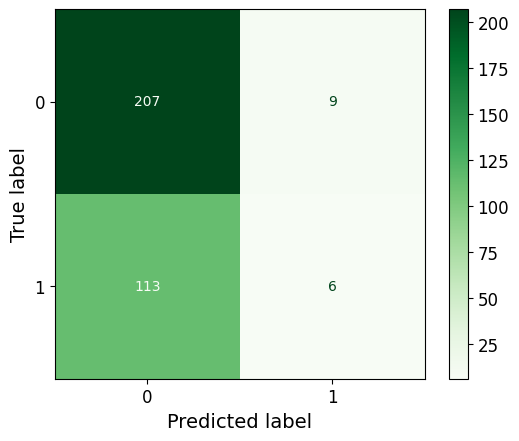

In [65]:
matrix = confusion_matrix(y_train, y_sgd_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=sgd_clf.classes_)
disp.plot(cmap = "Greens");

Los resultados de la matriz de confusion con el modelo SGDClassifier no son buenos, hay muchos falsos negativos(113 FN) y escasos verdaderos negativos(6 TN). Vamos a calcular los scores:

#### SCORES ➜ Cálculo de Precisión, Recall y F1
- **Precisión** = mide el porcentaje de predicciones positivas correctas. Siendo TP los verdaderos positivos y FP los Falsos Positivos de la matriz de confusión, la fórmula para calcular la precisión es TP/(TP+FP).

- **Sensibilidad(recall)** = también llamada tasa de verdaderos positivos, es la proporción de casos positivos que fueron correctamente detectados por el modelo entre todos los positivos reales. Siendo TP los verdaderos positivos y FN los Falsos Negativos de la matriz de confusión, la fórmula para calcular la precisión es TP/(TP+FP).
- **F1** = valor que se utiliza para combinar las medidas de precision y recall en un sólo valor. Es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la sensibilidad entre varias soluciones.

Estas métricas se pueden calcular con el módulo sklearn.metrics de la librería Scikit-learn (*sklearn*).

In [66]:
from sklearn import metrics
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_train, y_sgd_pred)
recall = recall_score(y_train, y_sgd_pred)
f1 = f1_score(y_train, y_sgd_pred)

print("Puntuaciones:\n")
print("Precisión:", np.round(precision,2), np.mean(precision)); # redondeo de 2 decimales para cada score
print("Recall:", np.round(recall, 2), np.mean(recall));
print("F1:", np.round(f1,2), np.mean(f1));


Puntuaciones:

Precisión: 0.4 0.4
Recall: 0.05 0.05042016806722689
F1: 0.09 0.08955223880597016


> En general, una buena predicción debería tener tanto una alta precisión como un alto recall, y un valor de F1 cercano a 1. Esto indicaría que el modelo es capaz de identificar correctamente la mayoría de las etiquetas positivas.

>Esta predicción ha sido mala porque la precisión es baja. Con un 40% de precisión indica que la mayoría de las predicciones positivas son incorrectas.
El recall es más bajo(5%), lo que indica que el modelo es poco sensible y que muchas de las verdaderas etiquetas positivas no han sido identificadas. Además el valor de F1 está muy lejano al 1, lo que confirma que el modelo no es nada bueno.

CURVA PRECISION Y RECALL:

In [67]:
from sklearn.metrics import precision_recall_curve;

y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function");

# se le pasa lo que debería haber predicho(y_train), y lo que ha predicho(y_scores)
# devuelve la curva de decisión
# thresholds son los umbrales
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores);

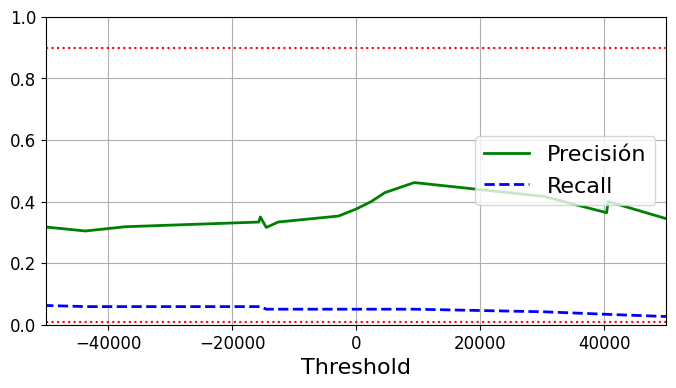

In [68]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "g-", label="Precisión", linewidth=2);
    plt.plot(thresholds, recalls[:-1], "b--", label="Recall", linewidth=2);
    plt.legend(loc="center right", fontsize=16);
    plt.xlabel("Threshold", fontsize=16);
    plt.grid(True);
    plt.axis([-50000, 50000, 0, 1]);

recall_90_precision = recalls[np.argmax(precisions >= 0.90)];
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)];

plt.figure(figsize=(8, 4));
plot_precision_recall_vs_threshold(precisions, recalls, thresholds);
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:");
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:");
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:");
plt.plot([threshold_90_precision], [0.9], "ro");
plt.plot([threshold_90_precision], [recall_90_precision], "ro");
plt.show();

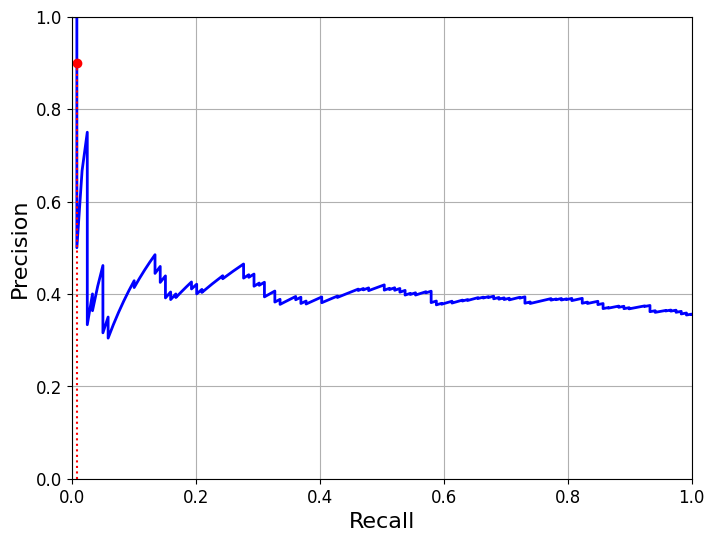

In [69]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2);
    plt.xlabel("Recall", fontsize=16);
    plt.ylabel("Precision", fontsize=16);
    plt.axis([0, 1, 0, 1]);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_precision_vs_recall(precisions, recalls);
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:");
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:");
plt.plot([recall_90_precision], [0.9], "ro");
plt.show();

#### **CURVA ROC**

La curva ROC es una representación gráfica de la sensibilidad frente a la precisión para un clasificador binario según se varía el umbral de discriminación. Cuanto más cerca esté la curva del punto (0,1), mejor será la clasificación.

In [70]:
from sklearn.metrics import roc_curve;

#falsos positivos, verdaderos positivos, umbrales
fpr, tpr, thresolds = roc_curve(y_train, y_scores);

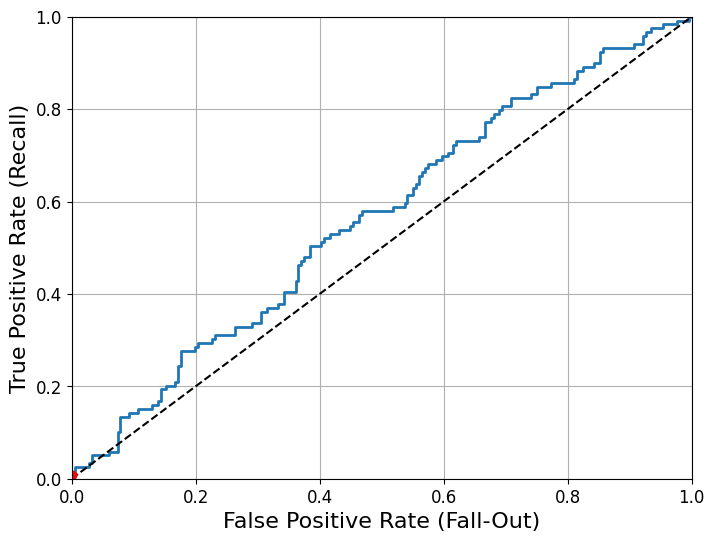

In [71]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label);
    plt.plot([0, 1], [0, 1], 'k--');
    plt.axis([0, 1, 0, 1]);
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16);
    plt.ylabel('True Positive Rate (Recall)', fontsize=16);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr, tpr);
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)];
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.show();

A partir de las puntuaciones de predicción(precision y recall), roc_auc_score calcula el área bajo la curva característica operativa del receptor (ROC AUC).


In [72]:
from sklearn.metrics import roc_auc_score;

roc_auc_score(y_train, y_scores)

0.5634920634920635

*➜ **RESULTADO** SGDClassifier:*

Como se han obtenido valores muy bajos de precisión y recall, la curva ROC está muy lejos del punto (0,1) y podemos asegurar que la clasificación con el modelo SGDClassifier no es buena.

### Modelo **RandomForestClassifier:**

RandomForest Classifier es un modelo de clasificación basado en árboles de decisión. Construye múltiples árboles de decisión y los combina para obtener una predicción final. Cada árbol de decisión se construye utilizando una muestra aleatoria del conjunto de datos de entrenamiento y un subconjunto aleatorio de características, lo que ayuda a prevenir el sobreajuste del modelo. Durante la predicción, el modelo RandomForest Classifier toma la predicción de cada árbol y la combina para obtener una predicción final utilizando una técnica conocida como "votación". 

Definimos el modelo

In [73]:
from sklearn.ensemble import RandomForestClassifier;

forest_clf =RandomForestClassifier(n_estimators=100, random_state=42)

forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Matriz de confusión

Realizamos la predicción con validación cruzada y calculamos la **matriz de confusión**:

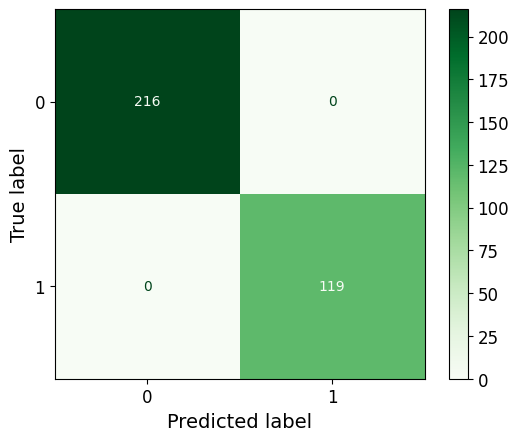

In [74]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicción cruzada
y_forest_pred = cross_val_predict(forest_clf,X_train, y_train, cv=3)

matrix = confusion_matrix(y_train, y_forest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=sgd_clf.classes_)
disp.plot(cmap = "Greens");

> Con el modelo RandomForest la matriz de confusión no tiene ningún falso 
positivo ni falso negativo, lo que signfica que el modelo ha podido sobreentrenar.

#### SCORES ➜ Cálculo de Precisión, Recall y F1

Definimos y calculamos los scores:

In [75]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3);

precision = precision_score(y_train, y_train_pred_forest)
recall = recall_score(y_train, y_train_pred_forest)
f1 = f1_score(y_train, y_train_pred_forest)

print("Puntuaciones:\n")
print("Precisión:", np.round(precision,2), np.mean(precision)); # redondeo de 2 decimales para cada score
print("Recall:", np.round(recall, 2), np.mean(recall));
print("F1:", np.round(f1,2), np.mean(f1));

Puntuaciones:

Precisión: 1.0 1.0
Recall: 1.0 1.0
F1: 1.0 1.0


> En general, una buena predicción debería tener tanto una alta precisión como un alto recall, y un valor de F1 cercano a 1. Esto indicaría que el modelo es capaz de identificar correctamente la mayoría de las etiquetas positivas.

> El modelo ha obtenido un puntaje perfecto de 1.0 para los scores de recall, F1 y precisión. Sin embargo, no necesariamente garantiza que el modelo tenga un buen desempeño en datos futuros. Como hemos visto antes en la matriz de confusión, es posible que el modelo se haya sobreajustado, lo que puede resultar en una solución deficiente en datos nuevos.

#### **CURVA ROC**

In [76]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba");

In [77]:
y_scores_forest=y_probas_forest[:,1];

# definimos los false positive, true positive y los umbrales
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train, y_scores_forest);

Esta es la curva ROC resultante:

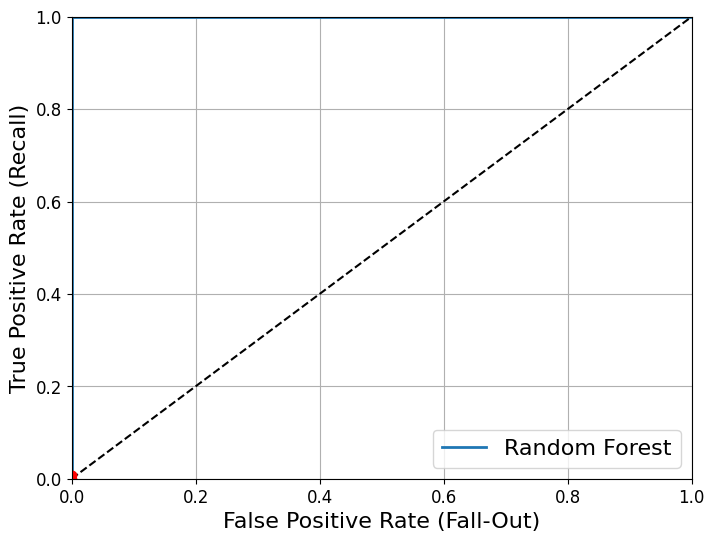

In [78]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)];

plt.figure(figsize=(8, 6));
#plt.plot(fpr_forest, tpr_forest, "b:", linewidth=2);
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest");
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:");
plt.plot([fpr_90], [recall_for_forest], "ro");
plt.grid(True);
plt.legend(loc="lower right", fontsize=16);
plt.show();

Área por debajo de la curva ROC:

In [79]:
roc_auc_score(y_train, y_scores_forest)


1.0

*➜ **RESULTADO** Random Forest Classifier:*

Como se esperaba, la curva ROC y el área por debajo de la curva son perfectas debido a que se ha obtenido una precisión y sensibilidad del 100% (1.0)respectivamente, y a que la matriz de confusión no tenga ningún falso positivo ni falso negativo. Con esto podemos asegurar que la clasificación con el modelo RandomForest sobreentrena.

### Modelo **XGBoost:**

El modelo XGBoost suele obtener buenos resultados de predicción con relativamente poco esfuerzo, en muchos casos equiparables o mejores que los devueltos por modelos más complejos computacionalmente, en particular para problemas con datos heterogéneos, como es el caso.

Siendo similar al modelo Random Forest, XGBoost se va construyendo secuencialmente en vez de paralelamente. Se debe a que el refuerzo es un aprendizaje iterativo, lo que significa que el modelo predice algo inicialmente y autoanaliza sus errores como un algoritmo de predicción y da más peso a los puntos de datos en los que hizo una predicción errónea en la siguiente iteración. Ese aprendizaje inicial se consigue aplicando el descenso de gradiente (de ahí su nombre eXtremeGradientBoost). 

Un modelo de este tipo, que evita que se produzcan predicciones al azar, es fiable la mayoría de las veces. 

Definimos el modelo

In [80]:
import xgboost as xgb;

xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42);

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### Matriz de confusión

Realizamos la predicción con validación cruzada y calculamos la **matriz de confusión**:

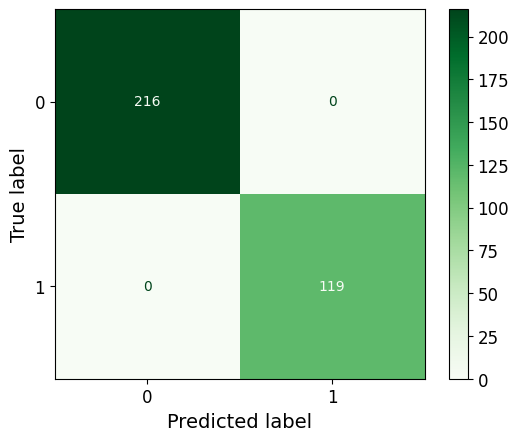

In [81]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicción cruzada
y_xgb_pred = cross_val_predict(xgb_clf,X_train, y_train, cv=3)

matrix = confusion_matrix(y_train, y_xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=xgb_clf.classes_)
disp.plot(cmap = "Greens");

> Al igual que con el modelo RandomForest, la matriz de confusión del modelo XGBoost no tiene ningún falso positivo ni falso negativo, lo que signfica que el modelo ha podido sobreentrenar.

El resultado de los scores y la curva ROC también va a ser el mismo.

#### SCORES ➜ Cálculo de Precisión, Recall y F1

Definimos y calculamos los scores:

In [82]:
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_train, y_xgb_pred, average=None)
recall = recall_score(y_train, y_xgb_pred, average=None)
f1 = f1_score(y_train, y_xgb_pred, average=None)

print('Puntuaciones:\n')
print("Precisión:", np.round(precision,2), np.mean(precision));
print("Recall:", np.round(recall,2), np.mean(recall));
print("F1:",np.round(f1,2), np.mean(f1));

Puntuaciones:

Precisión: [1. 1.] 1.0
Recall: [1. 1.] 1.0
F1: [1. 1.] 1.0


> En general, una buena predicción debería tener tanto una alta precisión como un alto recall, y un valor de F1 cercano a 1. Esto indicaría que el modelo es capaz de identificar correctamente la mayoría de las etiquetas positivas.

> El modelo ha obtenido un puntaje perfecto de 1.0 para los scores de recall, F1 y precisión. Sin embargo, no necesariamente garantiza que el modelo tenga un buen desempeño en datos futuros. Como hemos visto antes en la matriz de confusión, es posible que el modelo se haya sobreajustado, lo que puede resultar en una solución deficiente en datos nuevos.

CURVA PRECISION Y SENSIBILIDAD(RECALL)

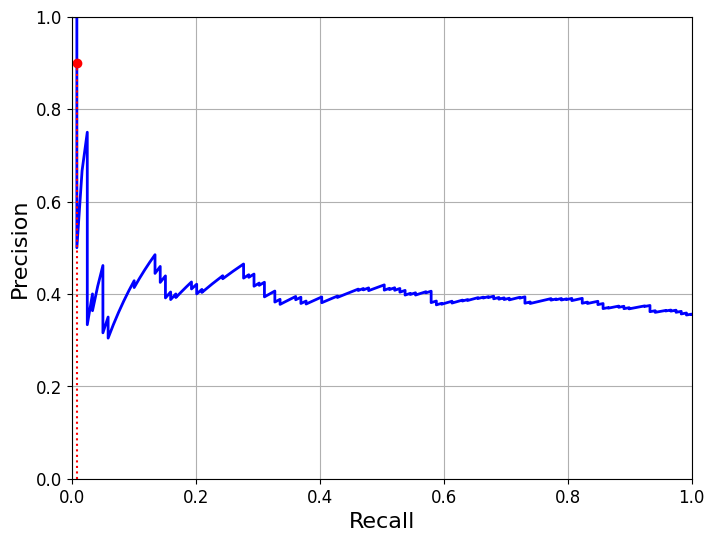

In [83]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2);
    plt.xlabel("Recall", fontsize=16);
    plt.ylabel("Precision", fontsize=16);
    plt.axis([0, 1, 0, 1]);
    plt.grid(True);

plt.figure(figsize=(8, 6));
plot_precision_vs_recall(precisions, recalls);
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:");
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:");
plt.plot([recall_90_precision], [0.9], "ro");
plt.show();

#### **CURVA ROC**

In [84]:
# se realiza la predcción
y_probas_xgb = cross_val_predict(xgb_clf, X_train, y_train, cv=3, method="predict_proba");

In [85]:
# [:,1] coge todas las filas de la segunda columna
y_scores_xgb=y_probas_xgb[:,1];
# falsos positivos, verdaderos positivos, umbrales
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_train, y_scores_xgb);

Esta es la curva ROC resultante:

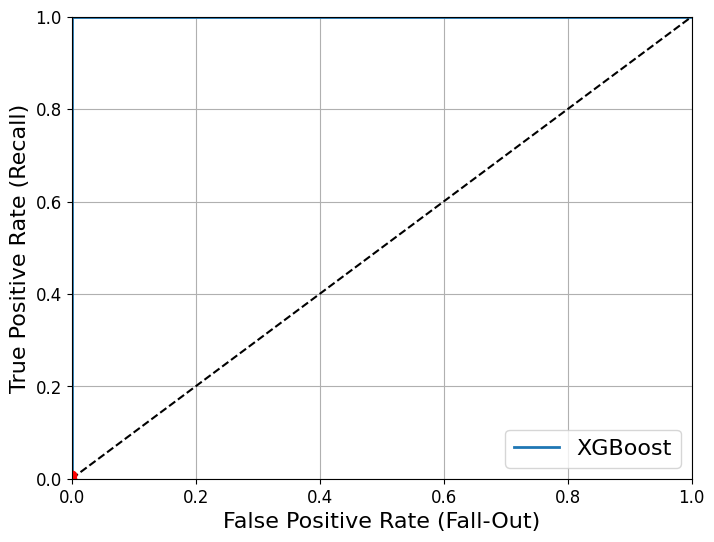

In [86]:
recall_for_xgb = tpr_xgb[np.argmax(fpr_xgb >= fpr_90)];

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr_xgb, tpr_xgb, "XGBoost");
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:");
plt.plot([fpr_90], [recall_for_forest], "ro");
plt.grid(True);
plt.legend(loc="lower right", fontsize=16);
plt.show();

**Área** por debajo de la curva ROC:

In [87]:
roc_auc_score(y_train, y_scores_xgb)

1.0

*➜ **RESULTADO** XGBoost:*

El modelo XGBoost ha obtenido la misma predicción que RandomForest, un puntaje perfecto de 1.0 para los scores de recall, F1 y precisión, del mismo modo que la curva ROC y el área bajo dicha curva. Sin embargo, no necesariamente garantiza que el modelo tenga un buen desempeño en datos futuros. Como hemos visto antes en la matriz de confusión, es posible que el modelo se haya sobreajustado, lo que puede resultar en una solución deficiente en datos nuevos.

# **TEST del clasificador binario**


Finalmente se realiza el test con el modelo que ha dado un mejor resultado. Una vez vistos los resultados de todos los modelos, podemos realizarlo con XGBoost o RandomForest, pues el resultado del testeo va a ser el mismo en ambos.

Definimos el conjunto de testeo eliminando la *columna objetivo Survived* del dataset.

In [90]:
y_test = X_test["Survived"].copy()
X_test = X_test.drop("Survived", axis=1)

Hacemos los mismos pasos pero ahora con el test set: cálculo de la Matriz de confusión, Scores y curva ROC.

In [91]:
import xgboost as xgb;

xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42);

xgb_clf.fit(X_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

#### Matriz de confusión

Realizamos la predicción con validación cruzada y calculamos la **matriz de confusión**:

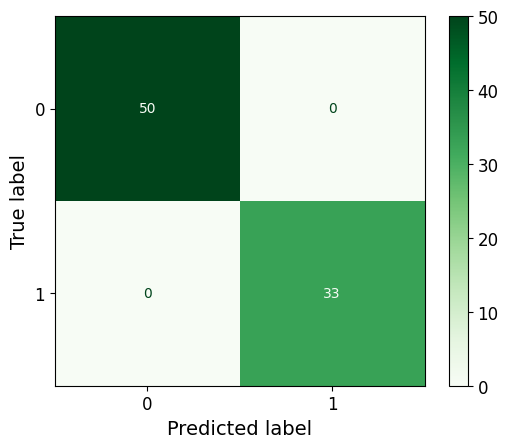

In [92]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicción cruzada
y_xgb_pred = cross_val_predict(xgb_clf,X_test, y_test, cv=3)

matrix = confusion_matrix(y_test, y_xgb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=xgb_clf.classes_)
disp.plot(cmap = "Greens");

> Como era de esperar se obtiene la misma matriz de confusión, sin falsos positivos ni falsos negativos, lo que signfica que el modelo de clasificación es perfecto para este conjunto de datos.

#### SCORES ➜ Cálculo de Precisión, Recall y F1

Definimos y calculamos los scores:

In [93]:
from sklearn.metrics import precision_score;
from sklearn.metrics import recall_score;
from sklearn.metrics import f1_score;

precision = precision_score(y_test, y_xgb_pred, average=None)
recall = recall_score(y_test, y_xgb_pred, average=None)
f1 = f1_score(y_test, y_xgb_pred, average=None)

print('Puntuaciones:\n')
print("Precisión:", np.round(precision,2), np.mean(precision));
print("Recall:", np.round(recall,2), np.mean(recall));
print("F1:",np.round(f1,2), np.mean(f1));

Puntuaciones:

Precisión: [1. 1.] 1.0
Recall: [1. 1.] 1.0
F1: [1. 1.] 1.0


> Todas las métricas vuelven a dar como resultado 1.0, por lo tanto también la misma curva ROC.

#### CURVA ROC

In [94]:
# se realiza la predcción
y_probas_xgb = cross_val_predict(xgb_clf, X_test, y_test, cv=3, method="predict_proba");

In [95]:
# [:,1] coge todas las filas de la segunda columna
y_scores_xgb=y_probas_xgb[:,1];
# falsos positivos, verdaderos positivos, umbrales
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, y_scores_xgb);

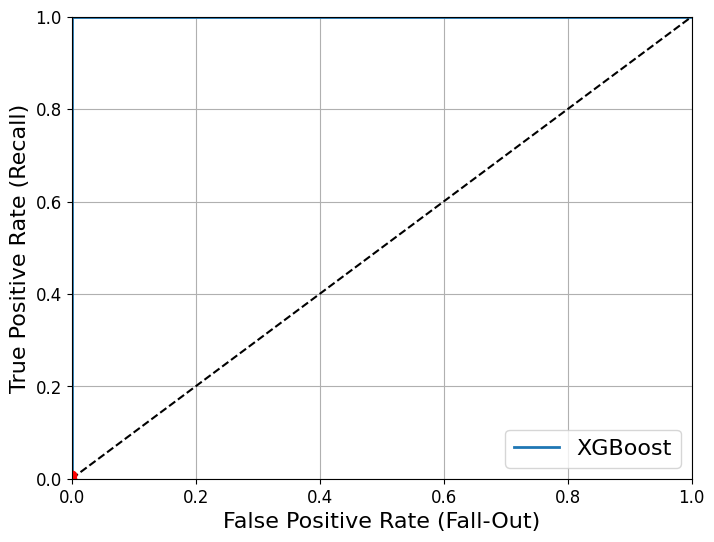

In [96]:
recall_for_xgb = tpr_xgb[np.argmax(fpr_xgb >= fpr_90)];

plt.figure(figsize=(8, 6));
plot_roc_curve(fpr_xgb, tpr_xgb, "XGBoost");
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:");
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:");
plt.plot([fpr_90], [recall_90_precision], "ro");
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:");
plt.plot([fpr_90], [recall_for_forest], "ro");
plt.grid(True);
plt.legend(loc="lower right", fontsize=16);
plt.show();

In [ ]:
roc_auc_score(y_train, y_scores_xgb)

1.0

# *➜ **CONCLUSIÓN FINAL** :*

De los resultados de los 3 modelos utilizados para esta clasificación binaria de la columna objetivo *Survived* del dataset *titanic.csv*, se concluye que el peor modelo es SGDClassifier, el cual ha obtenido resultados con una precisión bastante baja. 

Si tratamos de decidir cuál es mejor modelo entre RandomForest y XGBoost, la conclusión a la que se llega es que no hay uno que supere al otro, ya que ambos han obtenido la misma predicción, un puntaje "perfecto" de 1.0 para los scores de recall, F1 y precisión. 

Lo óptimo habría sido obtener unos resultados entre el 95% y 99% ya que se descartaría la posibilidad de sobreentrenamiento y por ello el modelo sería bueno, pero como hemos visto es posible que el modelo se haya sobreajustado, lo que puede resultar en una solución deficiente en datos nuevos.